In [1]:
import xgboost
import shap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import tensorflow as tf

df = pd.read_csv("C:\\Users\\Nicol\\Desktop\\bike_rental.csv")

c:\Users\Nicol\anaconda3\envs\tensorflow\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
X = df.drop(columns=['cnt'])
y = df['cnt']

In [3]:
np.random.seed(42)
tf.random.set_seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting
model1 = xgboost.XGBRegressor(random_state=42).fit(X_train,y_train)

# NN
from sklearn.linear_model import LinearRegression

# Create an instance of the linear regression model
model2 = LinearRegression()

# Train the model on the training data
model2.fit(X_train, y_train)


LinearRegression()

In [8]:
# Predicting results

preds1 = model1.predict(X_test)
preds2 = model2.predict(X_test)

explainer1 = shap.Explainer(model1)
explainer2 = shap.LinearExplainer(model2, X_test)

shap_values1 = explainer1(X_test)
shap_values2 = explainer2(X_test)


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [ ]:
with open("bike_rental_XBG_linear.txt", "w") as f:
    # header
    f.write("XGBoost , LR")
    colNames = list(df.columns)
    for el in colNames:
        f.write(", ")
        f.write(el)
    for i in range(0, len(y)):
        f.write(str(preds1[i]))
        f.write(", ")
        f.write(str(preds2[i]))
        f.write(", ")
        tmp_lst1 = []
        tmp_lst2 = []
        for j in range(0, len(shap_values1[i].values)):
            tmp_lst1.append(str(shap_values1[i].values[j]))
            tmp_lst1.append(", ")
        tmp_strng1 = ''.join(tmp_lst1)
        f.write(tmp_strng1)
        tmp_lst2 = []
        for j in range(0, len(shap_values2[i].values)):
            tmp_lst2.append(str(shap_values2[i].values[j]))
            tmp_lst2.append(", ")
        tmp_strng2 = ''.join(tmp_lst2)
        nw_ts2 = tmp_strng2[:-2]
        f.write(nw_ts2)
        f.write("\n")

In [17]:
with open("bike_rental_XGB_linear.txt", "w") as f:
    for i in range(0, len(y_test)):
        f.write(str(preds1[i]))
        f.write(", ")
        f.write(str(preds2[i]))
        f.write(", ")
        tmp_lst1 = []
        tmp_lst2 = []
        for j in range(0, len(shap_values1[i].values)):
            tmp_lst1.append(str(shap_values1[i].values[j]))
            tmp_lst1.append(", ")
        tmp_strng1 = ''.join(tmp_lst1)
        f.write(tmp_strng1)
        tmp_lst2 = []
        for j in range(0, len(shap_values2[i].values)):
            tmp_lst2.append(str(shap_values2[i].values[j]))
            tmp_lst2.append(", ")
        tmp_strng2 = ''.join(tmp_lst2)
        nw_ts2 = tmp_strng2[:-2]
        f.write(nw_ts2)
        f.write("\n")

In [18]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [22]:
shap_diffs = []
for i in range(0, len(y_test)):
    cur_shaps = []
    for j in range(0,len(shap_values1[i].values)):
        cur_d = shap_values1[i].values[j] - shap_values2[i].values[j]
        cur_shaps.append(cur_d)
    shap_diffs.append(cur_shaps)

In [23]:
# Load libraries and modules
import pandas as pd
from sklearn import preprocessing
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.linear_model import LinearRegression
from sklearn.metrics.cluster import normalized_mutual_info_score
import os
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [24]:
from sklearn.metrics import silhouette_score

# Extract the features into X
X1 = df.iloc[:, 1:].values

# Calculate the silhouette score for different numbers of clusters
scores = []
for n_clusters in range(2, 20):
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X1)
    silhouette_avg = silhouette_score(X1, cluster_labels)
    scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

# Find the optimal number of clusters
optimal_n_clusters = np.argmax(scores) + 2
print("Optimal number of clusters =", optimal_n_clusters)


For n_clusters = 2 The average silhouette_score is : 0.6392552714921999
For n_clusters = 3 The average silhouette_score is : 0.6013692972117587
For n_clusters = 4 The average silhouette_score is : 0.5860636955363371
For n_clusters = 5 The average silhouette_score is : 0.5732897013169687
For n_clusters = 6 The average silhouette_score is : 0.5655202175437737
For n_clusters = 7 The average silhouette_score is : 0.5551134084274164
For n_clusters = 8 The average silhouette_score is : 0.5456949230653998
For n_clusters = 9 The average silhouette_score is : 0.539444041768812
For n_clusters = 10 The average silhouette_score is : 0.5283749719517021
For n_clusters = 11 The average silhouette_score is : 0.5161875157140106
For n_clusters = 12 The average silhouette_score is : 0.5097174511477328
For n_clusters = 13 The average silhouette_score is : 0.491280932599545
For n_clusters = 14 The average silhouette_score is : 0.4808870421033609
For n_clusters = 15 The average silhouette_score is : 0.47008

In [25]:
kmeans = KMeans(n_clusters=optimal_n_clusters)
kmeans.fit(df)
labels=kmeans.labels_
df['cluster'] = labels
print(kmeans.cluster_centers_)

[[2.07417556e+02 2.31547311e+00 2.01112136e+03 5.90910975e+00
  1.12365012e+01 3.06767541e-02 2.99533630e+00 6.75717691e-01
  1.44698933e+00 4.65053373e-01 4.47205047e-01 6.41439527e-01
  1.92834584e-01 1.28412167e+02]
 [5.64339198e+02 2.73402329e+00 2.01197840e+03 7.32250970e+00
  1.19340233e+01 2.63906856e-02 3.01410091e+00 6.91461837e-01
  1.39818887e+00 5.36848642e-01 5.11437775e-01 6.09490298e-01
  1.86681164e-01 2.65670116e+02]]


The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

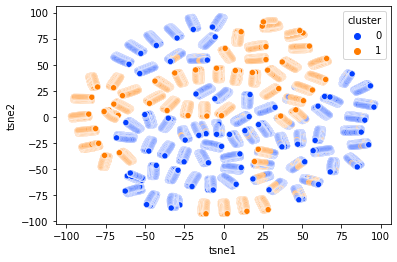

In [26]:
# t-SNE and scatterplot on original dataset, coloring it basing on cluster beloning

from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

df2 = pd.DataFrame(X_tsne, columns=['tsne1','tsne2'])
df2['label'] = y
df2['cluster'] = df['cluster']

sns.scatterplot(data=df2, x='tsne1', y='tsne2', hue='cluster', palette='bright')


In [ ]:
counts = df2['cluster'].value_counts()
print(counts)

In [29]:
from sklearn.metrics import mean_squared_error

mse1 = mean_squared_error(y_test, preds1)
mse2 = mean_squared_error(y_test, preds2)

print("MSE1: {}, MSE2:{}".format(mse1, mse2))

MSE1: 1448.3283695021405, MSE2:19376.302924146894
